# Training Your First Convolutional Neural Network (CNN)

In this exercise we're going to train a CNN using PyTorch.

I've already put together a cell to do the necessary imports and fetch the training and test data.


In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download training data from open datasets.
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 21423071.10it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 635475.94it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5563485.87it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6798903.91it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 1. Setup Dataloaders
PyTorch has a special object called a DataLoader which we can use to iterate through batches of X and y training and test batches.

In neural nets, you need to choose a batch size. You calculate the loss for one batch before doing the backpropagation for that batch.

```python
batch_size = ...

# Create data loaders.
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)
```

In [2]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)





## 2. Define Your CNN Model

In PyTorch, we define a class to make a model. Here's a basic CNN structure suitable for the MNIST dataset.

```python
# Define model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
```

In [3]:
# Define model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

3. Initialize Your Model, Loss Function, and Optimizer
Your model needs to be initialized. Do that. Print it to inspect it.

```python
model = CNN().to("cpu")
print(model)
```

You'll also need to initialize objects for your loss function (which says how badly a batch performed) and your optimizer (which moves the weights based on the loss).

```python
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
```


In [4]:
model = CNN().to("cpu")
print(model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## 4. Train your CNN

### 4a. Scaffolding for Epochs
One epoch is when you train your entire training dataset and then score your test dataset. You're going to do multiple epochs. Your pick as to how many (but I recommend less than 10 because it can take a while).

Make sure you initialize your model before we begin.

This is the rough scaffolding for the for-loop. We'll fill in the Train and Test sections in the next steps.

```python
num_epochs = ...
for epoch in range(num_epochs):
    # Train model for epoch
    ...
    # Test model for epoch
    ...

print("Model is done!")
```

### 4b. Training the Epoch
Here's some code for training our epoch. Read through it and try and make sense of it. You should be doing this exactly once per epoch inside the for-loop defined in step 4.

```python
# Train the epoch (loop over batches of training examples)
model.train()
for i, (X, y) in enumerate(train_dataloader):
    X = X.to("cpu")
    y = y.to("cpu")

    # Compute prediction error for the batch
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # Log our progress every 100 batches
    if i % 100 == 0:
        print(f"loss: {loss.item():>7f}  [{(i+1)*len(X):>5d}/{len(train_dataloader.dataset):>5d}]")
```

### 4c. Test the Epoch
We test every epoch. Here's the code.

```python
# Test the epoch (loop over batches of testing examples)
model.eval()
total_loss = 0
num_correct = 0
with torch.no_grad():
    for X, y in test_dataloader:
        X = X.to("cpu")
        y = y.to("cpu")
        pred = model(X)
        total_loss += loss_fn(pred, y).item()
        num_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

# Evaluate
avg_loss = total_loss / len(test_dataloader.dataset)
accuracy = num_correct / len(test_dataloader.dataset)
print(f"Test Error: \n Accuracy: {(100*accuracy):>0.1f}%, Avg loss: {avg_loss:>7f}")
```


### 4d. Train Your Model
Train your Convolutional Neural Network and track the accuracy and the loss function.

In [11]:
num_epochs = 4
for epoch in range(num_epochs):
    # Train the epoch (loop over batches of training examples)
    model.train()
    for i, (X, y) in enumerate(train_dataloader):
        X = X.to("cpu")
        y = y.to("cpu")

        # Compute prediction error for the batch
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Log our progress every 100 batches
        if i % 100 == 0:
            print(f"loss: {loss.item():>7f}  [{(i+1)*len(X):>5d}/{len(train_dataloader.dataset):>5d}]")

    # Test the epoch (loop over batches of testing examples)
    model.eval()
    total_loss = 0
    num_correct = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X = X.to("cpu")
            y = y.to("cpu")
            pred = model(X)
            total_loss += loss_fn(pred, y).item()
            num_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # Evaluate
    avg_loss = total_loss / len(test_dataloader.dataset)
    accuracy = num_correct / len(test_dataloader.dataset)
    print(f"Test Error: \n Accuracy: {(100*accuracy):>0.1f}%, Avg loss: {avg_loss:>7f}")


print("Model is done!")





loss: 0.454448  [   64/60000]
loss: 0.363408  [ 6464/60000]
loss: 0.374263  [12864/60000]
loss: 0.432373  [19264/60000]
loss: 0.362332  [25664/60000]
loss: 0.390212  [32064/60000]
loss: 0.264364  [38464/60000]
loss: 0.492992  [44864/60000]
loss: 0.463462  [51264/60000]
loss: 0.443716  [57664/60000]
Test Error: 
 Accuracy: 89.6%, Avg loss: 0.005762
loss: 0.378700  [   64/60000]
loss: 0.316641  [ 6464/60000]
loss: 0.306328  [12864/60000]
loss: 0.389585  [19264/60000]
loss: 0.304051  [25664/60000]
loss: 0.353175  [32064/60000]
loss: 0.211430  [38464/60000]
loss: 0.448829  [44864/60000]
loss: 0.413578  [51264/60000]
loss: 0.420045  [57664/60000]
Test Error: 
 Accuracy: 90.4%, Avg loss: 0.005135
loss: 0.332074  [   64/60000]
loss: 0.291223  [ 6464/60000]
loss: 0.264203  [12864/60000]
loss: 0.361174  [19264/60000]
loss: 0.266646  [25664/60000]
loss: 0.329085  [32064/60000]
loss: 0.178708  [38464/60000]
loss: 0.420081  [44864/60000]
loss: 0.378332  [51264/60000]
loss: 0.401912  [57664/60000]


## 5. Test on Real Images

Just like before, let's test on the real images in our `datasets/` folder. Did any do better or worse with this model?

```python
from torchvision import transforms
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

# Define the image preprocessing steps
preprocess = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((28, 28)),  # Resize to 28x28 pixels
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Set the model to eval mode
model.eval()

# Loop over 10 images
for i in range(1, 11):

    # Open the image
    img_path = f"/content/gdrive/MyDrive/datasets/mnist_test_sample/img_{i}.jpg"
    img = Image.open(img_path)

    # Preprocess the image
    img_tensor = preprocess(img)
    img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

    # Make prediction
    with torch.no_grad():
        output = model(img_tensor)
        predicted_class = output.argmax(1).item()

    # Display the image
    plt.figure(figsize=(2, 2))  # Set figure size to 2x2 inches
    plt.imshow(img, cmap="gray")
    plt.title("Input Image")
    plt.axis("off")
    plt.show()

    # Print the prediction
    print(f"Predicted class: {predicted_class}")
```

Mounted at /content/gdrive


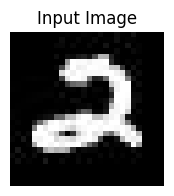

Predicted class: 2


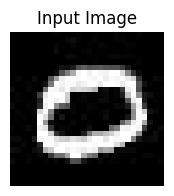

Predicted class: 0


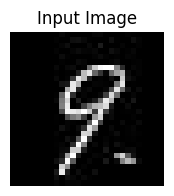

Predicted class: 9


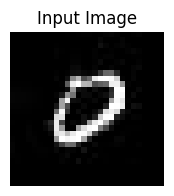

Predicted class: 4


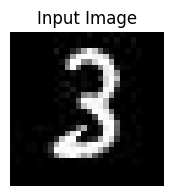

Predicted class: 3


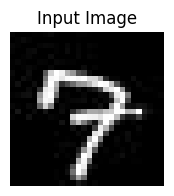

Predicted class: 7


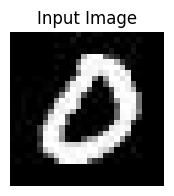

Predicted class: 0


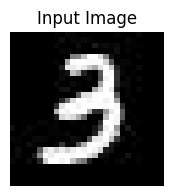

Predicted class: 3


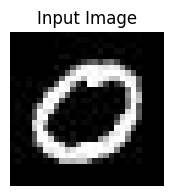

Predicted class: 0


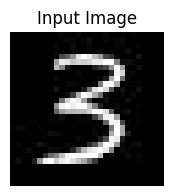

Predicted class: 3


In [8]:
from torchvision import transforms
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

# Define the image preprocessing steps
preprocess = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((28, 28)),  # Resize to 28x28 pixels
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Set the model to eval mode
model.eval()

# Loop over 10 images
for i in range(1, 11):

    # Open the image
    img_path = f"/content/gdrive/MyDrive/datasets/mnist_test_sample/img_{i}.jpg"
    img = Image.open(img_path)

    # Preprocess the image
    img_tensor = preprocess(img)
    img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

    # Make prediction
    with torch.no_grad():
        output = model(img_tensor)
        predicted_class = output.argmax(1).item()

    # Display the image
    plt.figure(figsize=(2, 2))  # Set figure size to 2x2 inches
    plt.imshow(img, cmap="gray")
    plt.title("Input Image")
    plt.axis("off")
    plt.show()

    # Print the prediction
    print(f"Predicted class: {predicted_class}")








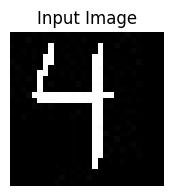

Predicted class: 9


In [10]:

# Open the image
img_path = f"my_4.jpg"
img = Image.open(img_path)

# Preprocess the image
img_tensor = preprocess(img)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

# Make prediction
with torch.no_grad():
    output = model(img_tensor)
    predicted_class = output.argmax(1).item()

# Display the image
plt.figure(figsize=(2, 2))  # Set figure size to 2x2 inches
plt.imshow(img, cmap="gray")
plt.title("Input Image")
plt.axis("off")
plt.show()

# Print the prediction
print(f"Predicted class: {predicted_class}")